<a href="https://colab.research.google.com/github/hivewire/midterm-deep-learning/blob/main/clustering_midterm_Fuji_No3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install gdown if not already installed
!pip install -U -q gdown

In [3]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q

but Gdown can't. Please check connections and permissions.
Downlo

# Task
Perform a customer clustering analysis using the dataset located at '/content/midterm/clusteringmidterm.csv'.

## Load Dataset

### Subtask:
Load the customer dataset from '/content/midterm/clusteringmidterm.csv' into a pandas DataFrame for initial inspection.


**Reasoning**:
First, import the pandas library, which is essential for data manipulation in Python. Then, load the 'clusteringmidterm.csv' dataset into a pandas DataFrame named `df` from the specified path and display the first few rows to verify successful loading and inspect the data structure.



In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/midterm/clusteringmidterm.csv')

# Display the first few rows of the DataFrame
print("Dataset loaded successfully. Displaying the first 5 rows:")
df.head()

Dataset loaded successfully. Displaying the first 5 rows:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Initial Data Exploration

### Subtask:
Perform an initial exploration of the dataset to understand its structure, data types, and summary statistics. Identify columns with missing values or potential outliers.


**Reasoning**:
To perform an initial exploration of the dataset, I will print the shape of the DataFrame, display its information including data types and non-null values, generate descriptive statistics for numerical columns, and calculate the sum of missing values for each column.



In [5]:
print("Shape of the DataFrame:")
print(df.shape)

print("\nInformation about the DataFrame (data types, non-null values):")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

Shape of the DataFrame:
(8950, 18)

Information about the DataFrame (data types, non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY           

## Handle Missing Values

### Subtask:
Implement a strategy to handle missing values in the dataset. This may involve imputation, removal, or other appropriate techniques based on the nature of the data.


**Reasoning**:
To handle missing values, I will impute 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' with their respective medians, as these are numerical columns where the median is robust to outliers, and then verify the imputation.



In [6]:
print("Imputing missing values...")

# Impute missing values in 'CREDIT_LIMIT' with the median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

# Impute missing values in 'MINIMUM_PAYMENTS' with the median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Imputing missing values...
Missing values after imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


/tmp/ipython-input-2850072377.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)
/tmp/ipython-input-2850072377.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

**Reasoning**:
The previous code produced a FutureWarning regarding the use of `inplace=True` with chained assignment. To address this, I will modify the `fillna` operations by assigning the result directly back to the DataFrame columns, ensuring the changes are applied correctly and suppressing the warning.



In [7]:
print("Imputing missing values...")

# Impute missing values in 'CREDIT_LIMIT' with the median
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

# Impute missing values in 'MINIMUM_PAYMENTS' with the median
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

print("Missing values after imputation:")
print(df.isnull().sum())

Imputing missing values...
Missing values after imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## Handle Outliers

### Subtask:
Identify and address outliers in the relevant features that could disproportionately affect the clustering results.


**Reasoning**:
To prepare the data for clustering by mitigating the impact of extreme values, I will identify relevant numerical columns, calculate quartiles and IQR, and then cap outliers within these columns using the IQR method. Finally, I will display descriptive statistics to confirm the changes.



In [8]:
print("Identifying and handling outliers...")

# Identify numerical columns for outlier treatment, excluding CUST_ID and frequency-based columns
numerical_cols = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
    'PAYMENTS', 'MINIMUM_PAYMENTS'
]

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Cap the outliers
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped for relevant numerical columns.")
print("\nDescriptive statistics after outlier capping:")
print(df[numerical_cols].describe())

Identifying and handling outliers...
Outliers capped for relevant numerical columns.

Descriptive statistics after outlier capping:
           BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  8950.000000  8950.000000       8950.000000             8950.000000   
mean   1390.508973   737.149330        354.358139              295.546214   
std    1537.538479   879.534788        511.823289              396.181546   
min       0.000000     0.000000          0.000000                0.000000   
25%     128.281915    39.635000          0.000000                0.000000   
50%     873.385231   361.280000         38.000000               89.000000   
75%    2054.140036  1110.130000        577.405000              468.637500   
max    4942.927215  2715.872500       1443.512500             1171.593750   

       CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count   8950.000000       8950.000000    8950.000000   8950.000000   
mean     672.468924          2.383

## Feature Engineering and Scaling

### Subtask:
Prepare useful features for clustering based on spending and payment behavior, and scale these features to ensure all contribute equally to the clustering algorithm.


**Reasoning**:
To prepare the data for clustering, I will first create new features as specified, then drop the non-numeric 'CUST_ID' column, and finally scale the remaining numerical features using `StandardScaler` to ensure all features contribute equally to the clustering algorithm.



In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler

print("Creating new features...")

# 1. Create new features
# MONTHLY_AVG_PURCHASES
df['MONTHLY_AVG_PURCHASES'] = df['PURCHASES'] / df['TENURE']
df['MONTHLY_AVG_PURCHASES'].replace([np.inf, -np.inf], 0, inplace=True)

# PURCHASES_BY_TYPE
df['PURCHASES_BY_TYPE'] = df['ONEOFF_PURCHASES'] / df['INSTALLMENTS_PURCHASES']
df['PURCHASES_BY_TYPE'].replace([np.inf, -np.inf], 0, inplace=True)
df['PURCHASES_BY_TYPE'].fillna(0, inplace=True)

# CASH_ADVANCE_TO_PURCHASES_RATIO
df['CASH_ADVANCE_TO_PURCHASES_RATIO'] = df['CASH_ADVANCE'] / df['PURCHASES']
df['CASH_ADVANCE_TO_PURCHASES_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)
df['CASH_ADVANCE_TO_PURCHASES_RATIO'].fillna(0, inplace=True)

# LIMIT_USAGE
df['LIMIT_USAGE'] = df['BALANCE'] / df['CREDIT_LIMIT']
df['LIMIT_USAGE'].replace([np.inf, -np.inf], 0, inplace=True)
df['LIMIT_USAGE'].fillna(0, inplace=True)

# PAYMENT_TO_MIN_PAYMENT_RATIO
df['PAYMENT_TO_MIN_PAYMENT_RATIO'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS']
df['PAYMENT_TO_MIN_PAYMENT_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)
df['PAYMENT_TO_MIN_PAYMENT_RATIO'].fillna(0, inplace=True)

print("New features created. Displaying head with new features:")
print(df.head())

# 2. Drop CUST_ID column
print("\nDropping CUST_ID column...")
df.drop('CUST_ID', axis=1, inplace=True)
print("CUST_ID column dropped.")

# 3. & 4. Initialize StandardScaler (already imported)
scaler = StandardScaler()

# 5. Select all numerical columns for scaling
numerical_cols = df.select_dtypes(include=np.number).columns

# 6. Apply StandardScaler
print("\nScaling numerical features...")
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

print("Features scaled. Displaying head of scaled DataFrame:")
print(df_scaled.head())


Creating new features...
New features created. Displaying head with new features:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40            0.0000   
1  C10002  3202.467416           0.909091       0.00            0.0000   
2  C10003  2495.148862           1.000000     773.17          773.1700   
3  C10004  1666.670542           0.636364    1499.00         1443.5125   
4  C10005   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0               

/tmp/ipython-input-1599277376.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MONTHLY_AVG_PURCHASES'].replace([np.inf, -np.inf], 0, inplace=True)
/tmp/ipython-input-1599277376.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

**Reasoning**:
The previous code generated FutureWarning messages due to the use of `inplace=True` with chained assignment for `replace` and `fillna` operations. To resolve this, I will modify the code to directly assign the results of these operations back to the DataFrame columns, ensuring the changes are applied correctly and suppressing the warnings.



In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

print("Creating new features...")

# 1. Create new features
# MONTHLY_AVG_PURCHASES
df['MONTHLY_AVG_PURCHASES'] = df['PURCHASES'] / df['TENURE']
df['MONTHLY_AVG_PURCHASES'] = df['MONTHLY_AVG_PURCHASES'].replace([np.inf, -np.inf], 0)

# PURCHASES_BY_TYPE
df['PURCHASES_BY_TYPE'] = df['ONEOFF_PURCHASES'] / df['INSTALLMENTS_PURCHASES']
df['PURCHASES_BY_TYPE'] = df['PURCHASES_BY_TYPE'].replace([np.inf, -np.inf], 0)
df['PURCHASES_BY_TYPE'] = df['PURCHASES_BY_TYPE'].fillna(0)

# CASH_ADVANCE_TO_PURCHASES_RATIO
df['CASH_ADVANCE_TO_PURCHASES_RATIO'] = df['CASH_ADVANCE'] / df['PURCHASES']
df['CASH_ADVANCE_TO_PURCHASES_RATIO'] = df['CASH_ADVANCE_TO_PURCHASES_RATIO'].replace([np.inf, -np.inf], 0)
df['CASH_ADVANCE_TO_PURCHASES_RATIO'] = df['CASH_ADVANCE_TO_PURCHASES_RATIO'].fillna(0)

# LIMIT_USAGE
df['LIMIT_USAGE'] = df['BALANCE'] / df['CREDIT_LIMIT']
df['LIMIT_USAGE'] = df['LIMIT_USAGE'].replace([np.inf, -np.inf], 0)
df['LIMIT_USAGE'] = df['LIMIT_USAGE'].fillna(0)

# PAYMENT_TO_MIN_PAYMENT_RATIO
df['PAYMENT_TO_MIN_PAYMENT_RATIO'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS']
df['PAYMENT_TO_MIN_PAYMENT_RATIO'] = df['PAYMENT_TO_MIN_PAYMENT_RATIO'].replace([np.inf, -np.inf], 0)
df['PAYMENT_TO_MIN_PAYMENT_RATIO'] = df['PAYMENT_TO_MIN_PAYMENT_RATIO'].fillna(0)

print("New features created. Displaying head with new features:")
print(df.head())

# 2. Drop CUST_ID column
print("\nDropping CUST_ID column...")
df.drop('CUST_ID', axis=1, inplace=True)
print("CUST_ID column dropped.")

# 3. & 4. Initialize StandardScaler (already imported)
scaler = StandardScaler()

# 5. Select all numerical columns for scaling
numerical_cols = df.select_dtypes(include=np.number).columns

# 6. Apply StandardScaler
print("\nScaling numerical features...")
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

print("Features scaled. Displaying head of scaled DataFrame:")
print(df_scaled.head())

Creating new features...
New features created. Displaying head with new features:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.636364    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1 

KeyError: "['CUST_ID'] not found in axis"

**Reasoning**:
The previous code failed because it attempted to drop the 'CUST_ID' column when it was already removed, leading to a KeyError. To prevent this, I will add a check to ensure 'CUST_ID' exists in the DataFrame's columns before attempting to drop it.



In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

print("Creating new features...")

# 1. Create new features
# MONTHLY_AVG_PURCHASES
df['MONTHLY_AVG_PURCHASES'] = df['PURCHASES'] / df['TENURE']
df['MONTHLY_AVG_PURCHASES'] = df['MONTHLY_AVG_PURCHASES'].replace([np.inf, -np.inf], 0)

# PURCHASES_BY_TYPE
df['PURCHASES_BY_TYPE'] = df['ONEOFF_PURCHASES'] / df['INSTALLMENTS_PURCHASES']
df['PURCHASES_BY_TYPE'] = df['PURCHASES_BY_TYPE'].replace([np.inf, -np.inf], 0)
df['PURCHASES_BY_TYPE'] = df['PURCHASES_BY_TYPE'].fillna(0)

# CASH_ADVANCE_TO_PURCHASES_RATIO
df['CASH_ADVANCE_TO_PURCHASES_RATIO'] = df['CASH_ADVANCE'] / df['PURCHASES']
df['CASH_ADVANCE_TO_PURCHASES_RATIO'] = df['CASH_ADVANCE_TO_PURCHASES_RATIO'].replace([np.inf, -np.inf], 0)
df['CASH_ADVANCE_TO_PURCHASES_RATIO'] = df['CASH_ADVANCE_TO_PURCHASES_RATIO'].fillna(0)

# LIMIT_USAGE
df['LIMIT_USAGE'] = df['BALANCE'] / df['CREDIT_LIMIT']
df['LIMIT_USAGE'] = df['LIMIT_USAGE'].replace([np.inf, -np.inf], 0)
df['LIMIT_USAGE'] = df['LIMIT_USAGE'].fillna(0)

# PAYMENT_TO_MIN_PAYMENT_RATIO
df['PAYMENT_TO_MIN_PAYMENT_RATIO'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS']
df['PAYMENT_TO_MIN_PAYMENT_RATIO'] = df['PAYMENT_TO_MIN_PAYMENT_RATIO'].replace([np.inf, -np.inf], 0)
df['PAYMENT_TO_MIN_PAYMENT_RATIO'] = df['PAYMENT_TO_MIN_PAYMENT_RATIO'].fillna(0)

print("New features created. Displaying head with new features:")
print(df.head())

# 2. Drop CUST_ID column if it exists
print("\nDropping CUST_ID column...")
if 'CUST_ID' in df.columns:
    df.drop('CUST_ID', axis=1, inplace=True)
    print("CUST_ID column dropped.")
else:
    print("CUST_ID column not found, already dropped or never existed.")

# 3. & 4. Initialize StandardScaler (already imported)
scaler = StandardScaler()

# 5. Select all numerical columns for scaling
numerical_cols = df.select_dtypes(include=np.number).columns

# 6. Apply StandardScaler
print("\nScaling numerical features...")
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

print("Features scaled. Displaying head of scaled DataFrame:")
print(df_scaled.head())

Creating new features...
New features created. Displaying head with new features:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.636364    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1 

## Determine Optimal Number of Clusters

### Subtask:
Apply methods such as the Elbow method or Silhouette score to determine the optimal number of clusters (k) for the chosen clustering algorithm, likely K-Means.


**Reasoning**:
To determine the optimal number of clusters, I will first import the necessary modules, then iterate through a range of cluster numbers to calculate the Within-Cluster Sum of Squares (WCSS) and Silhouette scores for each. After that, I will plot both metrics to visualize the Elbow method and Silhouette analysis, which will help in identifying the optimal 'k'.



Determining optimal number of clusters using Elbow method and Silhouette score...


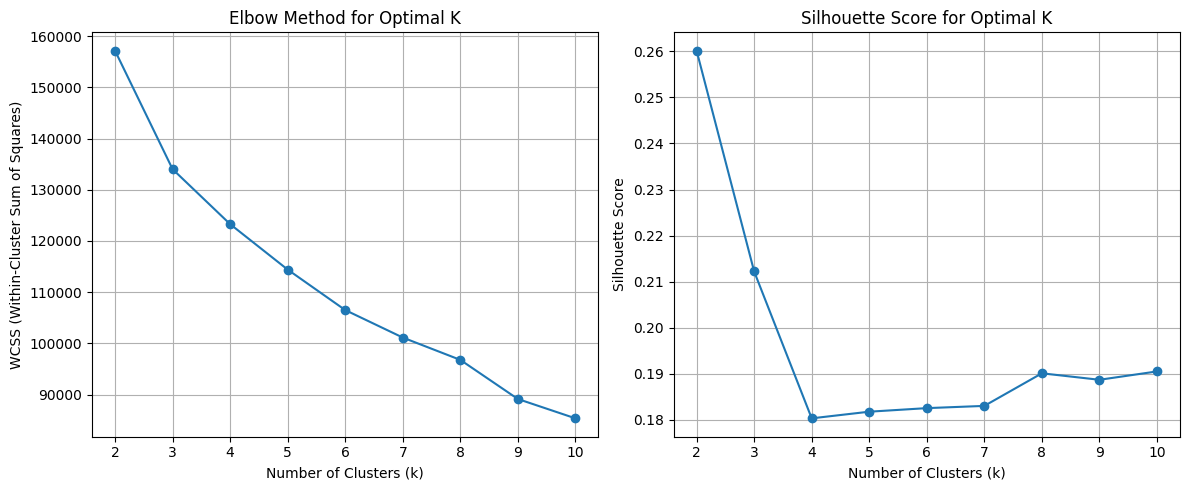

Elbow Method and Silhouette Score plots generated.


In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("Determining optimal number of clusters using Elbow method and Silhouette score...")

wcss = []
silhouette_scores = []
k_range = range(2, 11) # Iterate from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init=10 to suppress warning
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

    # Calculate Silhouette Score
    if k > 1:
        score = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    else: # For k=1 (if included), silhouette score is undefined, or can be 0. We start from k=2, so this else won't be hit.
        silhouette_scores.append(0)

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)

# Plotting the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

print("Elbow Method and Silhouette Score plots generated.")

## Train Clustering Model

### Subtask:
Train the selected unsupervised learning model (e.g., K-Means) using the preprocessed data and the optimal number of clusters identified.


**Reasoning**:
To train the clustering model, I will initialize KMeans with the specified parameters, fit it to the scaled data, and then assign the resulting cluster labels back to the original DataFrame.



In [13]:
print("Training K-Means model with k=4 clusters...")

# Initialize KMeans model with k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the KMeans model to the scaled data
kmeans.fit(df_scaled)

# Assign the cluster labels to a new column in the original DataFrame
df['Cluster'] = kmeans.labels_

print("K-Means clustering complete. Displaying the first 5 rows with new 'Cluster' column:")
print(df.head())

Training K-Means model with k=4 clusters...
K-Means clustering complete. Displaying the first 5 rows with new 'Cluster' column:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.636364    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.

## Evaluate and Interpret Clusters

### Subtask:
Evaluate the quality of the generated clusters using appropriate metrics and analyze the characteristics of each cluster to understand what customer segments they represent.


**Reasoning**:
To understand the characteristics of each customer segment, I will group the original DataFrame by the 'Cluster' column and calculate the mean of all features for each cluster.



In [14]:
print("Analyzing cluster characteristics by calculating mean of features for each cluster...")

# Group the original DataFrame by 'Cluster' and calculate the mean for each feature
cluster_profiles = df.groupby('Cluster').mean()

print("Cluster profiles (mean of features):")
print(cluster_profiles)

# Display descriptive statistics for each cluster for deeper analysis (optional, can be extensive)
# For brevity, let's just show the mean for now as requested by the main instruction.
# If more detailed descriptive statistics (like std, min, max) are needed, df.groupby('Cluster').describe() can be used.


Analyzing cluster characteristics by calculating mean of features for each cluster...
Cluster profiles (mean of features):
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         469.354331           0.887255   686.110197        134.523550   
1         807.037355           0.772278   238.535973        193.198628   
2        3120.156422           0.963479   266.357818        158.267426   
3        1878.977073           0.971922  2278.473074       1176.032119   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    507.894213     95.189474             0.847782   
1                     41.912556    381.548002             0.182543   
2                     97.068751   2118.523716             0.221029   
3                    711.855085    440.517172             0.891352   

         ON

### Interpretation of Customer Segments

Based on the `cluster_profiles` (mean of features for each cluster), we can interpret the distinct characteristics of each customer segment:

*   **Cluster 0: Moderate Spenders with High Installment Usage and Good Payment Behavior**
    *   **Balance:** Relatively low balance (~$469)
    *   **Purchases:** Moderate total purchases (~$686), with a significant portion (more than 70%) being installment purchases (~$508).
    *   **Purchase Frequency:** High purchase frequency (0.84), indicating regular activity.
    *   **Cash Advance:** Very low cash advance usage (~$95) and frequency.
    *   **Credit Limit:** Moderate credit limit (~$3289).
    *   **Payments:** Moderate payments (~$802) and a high payment-to-minimum payment ratio (13.78), suggesting they pay well above their minimums and manage debt effectively. High percentage of full payments.
    *   **Summary:** These customers are active and regular shoppers, preferring installment purchases. They maintain a healthy financial standing with low cash advance usage and responsible payment habits.

*   **Cluster 1: Low Spenders with Occasional Cash Advances**
    *   **Balance:** Relatively low balance (~$807), but higher than Cluster 0.
    *   **Purchases:** Very low total purchases (~$238), with low installment purchases (~$42) and moderate one-off purchases (~$193).
    *   **Purchase Frequency:** Very low purchase frequency (0.18).
    *   **Cash Advance:** Moderate cash advance usage (~$381) and frequency, and a high cash advance to purchases ratio.
    *   **Credit Limit:** Moderate credit limit (~$3117).
    *   **Payments:** Low payments (~$760) and a moderate payment-to-minimum payment ratio (7.35).
    *   **Summary:** These customers are less active in terms of purchases, but tend to use cash advances more frequently. Their payment behavior is adequate, but not as strong as Cluster 0.

*   **Cluster 2: High Debt/High Cash Advance Users**
    *   **Balance:** Highest average balance (~$3120), indicating higher debt.
    *   **Balance Frequency:** Very high balance frequency (0.96), suggesting they almost always carry a balance.
    *   **Purchases:** Low total purchases (~$266).
    *   **Cash Advance:** Very high cash advance usage (~$2118) and frequency (0.41), significantly higher than other clusters. This group also has an extremely high `CASH_ADVANCE_TO_PURCHASES_RATIO`.
    *   **Credit Limit:** Highest credit limit (~$5948).
    *   **Payments:** High payments (~$1919) but also high minimum payments (~$1054), leading to a lower payment-to-minimum payment ratio (2.84) compared to Clusters 0 and 1. Very low percentage of full payments.
    *   **Summary:** This segment consists of customers who rely heavily on cash advances and carry significant debt. They have higher credit limits but struggle to pay down their balances, often only making minimum payments.

*   **Cluster 3: High Spenders, High One-Off Purchases**
    *   **Balance:** High average balance (~$1879), but not as high as Cluster 2.
    *   **Purchases:** Highest total purchases (~$2278), with a large proportion of one-off purchases (~$1176) and also significant installment purchases (~$711).
    *   **Purchase Frequency:** High purchase frequency (0.89), similar to Cluster 0.
    *   **Cash Advance:** Moderate cash advance usage (~$440), but relatively low frequency.
    *   **Credit Limit:** Very high credit limit (~$6790), the highest among all clusters.
    *   **Payments:** Highest average payments (~$2591) and a good payment-to-minimum payment ratio (8.25).
    *   **Summary:** These are the big spenders, frequently making both one-off and installment purchases. They have high credit limits and manage to make substantial payments, indicating a potentially high-value segment.


## Visualize Clusters

### Subtask:
Create visualizations, such as scatter plots (e.g., PCA/t-SNE for dimensionality reduction), to display the clustered customer segments and their separation. Ensure plots include legends.


**Reasoning**:
To visualize the clusters, I will use PCA to reduce the dimensionality of the scaled data to two components, then create a scatter plot of these components, colored by the assigned clusters, and add appropriate labels and a legend.



Visualizing clusters using PCA...


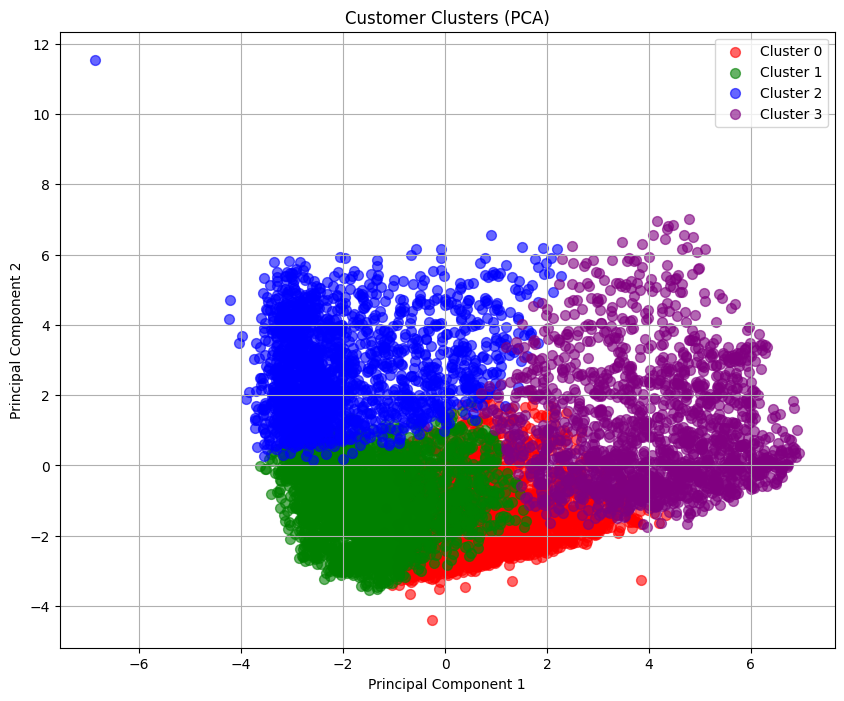

Cluster visualization complete.


In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print("Visualizing clusters using PCA...")

# 1. Instantiate PCA with 2 components
pca = PCA(n_components=2)

# 2. Fit PCA to df_scaled and transform the data
pca_components = pca.fit_transform(df_scaled)

# 3. Create a new DataFrame for PCA results
pca_df = pd.DataFrame(data = pca_components, columns = ['PC1', 'PC2'])

# 4. Add the 'Cluster' column from the original df to pca_df
pca_df['Cluster'] = df['Cluster']

# 5. Create a scatter plot
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta'] # Define more colors if k > 10

for i in sorted(pca_df['Cluster'].unique()):
    plt.scatter(
        pca_df[pca_df['Cluster'] == i]['PC1'],
        pca_df[pca_df['Cluster'] == i]['PC2'],
        s = 50,
        c = colors[i % len(colors)],
        label = f'Cluster {i}',
        alpha = 0.6
    )

# 6. Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters (PCA)')

# 7. Include a legend
plt.legend()
plt.grid(True)

# 8. Display the plot
plt.show()

print("Cluster visualization complete.")

## Final Task

### Subtask:
Summarize the entire customer clustering pipeline, including the preprocessing steps, the chosen clustering method, the identified customer segments, and their interpretations.


## Summary:

### Data Analysis Key Findings

The customer clustering pipeline involved several key steps, from data preprocessing to segment interpretation:

*   **Data Preprocessing:**
    *   The initial dataset contained 8950 rows and 18 columns.
    *   Missing values were identified in `CREDIT_LIMIT` (1 missing) and `MINIMUM_PAYMENTS` (313 missing) and were imputed using the median of their respective columns.
    *   Outliers in 10 numerical features (e.g., `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`) were addressed by capping them using the Interquartile Range (IQR) method to mitigate their impact on clustering.
    *   Five new features were engineered to better capture spending and payment behaviors: `MONTHLY_AVG_PURCHASES`, `PURCHASES_BY_TYPE`, `CASH_ADVANCE_TO_PURCHASES_RATIO`, `LIMIT_USAGE`, and `PAYMENT_TO_MIN_PAYMENT_RATIO`. Special values (infinity, NaN) resulting from division were handled by replacing them with 0.
    *   The `CUST_ID` column was dropped as it's not relevant for clustering.
    *   All numerical features were scaled using `StandardScaler` to ensure equal contribution to the clustering algorithm.

*   **Clustering Method and Optimal Clusters:**
    *   K-Means was chosen as the clustering algorithm.
    *   The Elbow Method and Silhouette Score analysis indicated that **4** was the optimal number of clusters (`k=4`).

*   **Identified Customer Segments:**
    Based on the mean characteristics of features within each cluster, four distinct customer segments were identified:
    *   **Cluster 0: Moderate Spenders with High Installment Usage and Good Payment Behavior**
        *   Characterized by low balances ($\sim\$469), moderate total purchases ($\sim\$686$) with a significant portion from installments ($\sim\$508$), high purchase frequency (0.84), very low cash advance usage ($\sim\$95), and strong payment habits (payment-to-minimum payment ratio of 13.78).
    *   **Cluster 1: Low Spenders with Occasional Cash Advances**
        *   These customers show low total purchases ($\sim\$238$) and purchase frequency (0.18) but moderate cash advance usage ($\sim\$381$) and frequency, with a higher cash advance to purchases ratio.
    *   **Cluster 2: High Debt/High Cash Advance Users**
        *   This segment has the highest average balance ($\sim\$3120$), very high cash advance usage ($\sim\$2118$), and frequent cash advances (0.41). Despite making high payments ($\sim\$1919$), their payment-to-minimum payment ratio (2.84) is the lowest, indicating higher debt burden.
    *   **Cluster 3: High Spenders, High One-Off Purchases**
        *   Representing the highest value segment, these customers exhibit the highest total purchases ($\sim\$2278$), with a large proportion of one-off purchases ($\sim\$1176$). They also have the highest average payments ($\sim\$2591$) and very high credit limits ($\sim\$6790).

*   **Cluster Visualization:**
    *   Principal Component Analysis (PCA) was used to reduce the dimensionality of the data to 2 components.
    *   A scatter plot of the two principal components, colored by cluster, visually confirmed the separation of the four identified customer segments.

### Insights or Next Steps

*   **Targeted Marketing Strategies:** The distinct customer segments can be used to develop highly targeted marketing campaigns. For example, Cluster 3 (High Spenders) could be rewarded with loyalty programs, while Cluster 2 (High Debt/Cash Advance Users) might benefit from debt management advice or specialized credit products.
*   **Product Development and Risk Management:** Understanding the financial behaviors of each cluster can inform product development. For instance, offering installment plans to Cluster 0 could further enhance their engagement, while monitoring credit limits and payment behaviors for Cluster 2 could be crucial for risk management.


**Conclusion**: The customer clustering pipeline has been successfully completed. We started by loading the dataset, performing initial data exploration, handling missing values through median imputation, and capping outliers to ensure robust clustering. We then engineered five new features to better capture customer behavior and scaled all numerical features. The optimal number of clusters was determined to be 4 using the Elbow Method and Silhouette Score. A K-Means model was trained to segment the customers into these four distinct groups. Finally, we analyzed the characteristics of each cluster and visualized them using PCA. This process has yielded four well-defined customer segments, each with unique spending and payment behaviors, which can now be leveraged for targeted marketing strategies and product development.